# Problema y Objetivos
El objetivo de este análisis es comprender los factores que contribuyen a la enfermedad cardíaca y construir un modelo predictivo para clasificar si un paciente tiene o no la enfermedad. 
Nos enfocaremos en:

1. **Entender la estructura y contenido del dataset.**
2. **Realizar una limpieza y preprocesamiento de datos.**
3. **Explorar y analizar las relaciones entre las variables.**
4. **Construir y evaluar modelos de predicción.**

## Preguntas clave:
1. ¿Cuáles son los principales factores asociados con la presencia de enfermedad cardíaca?
2. ¿Existen patrones claros entre las variables que podamos utilizar para la predicción?
3. ¿Qué modelo ofrece el mejor rendimiento para este dataset?


---



## Importación de Librerías
Primero, importamos las librerías necesarias para el análisis, incluyendo:
- `KaggleApi` para descargar datos directamente de Kaggle.
- `pandas` y `numpy` para manejo y análisis de datos.
- `matplotlib` y `seaborn` para visualizaciones.
Además, configuramos los estilos de gráficos para que tengan un diseño uniforme y atractivo.



In [473]:
# Importar librerías
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


# Configuración de gráficos
sns.set_palette('viridis')
plt.style.use('ggplot')

print("Librerías importadas correctamente.")


Librerías importadas correctamente.


---

## Descarga del Dataset desde Kaggle
Utilizamos la API de Kaggle para descargar y descomprimir automáticamente el dataset **Heart Disease Data**. Esto nos asegura trabajar con datos actualizados directamente desde su fuente.

### Pasos:
1. Autenticamos la API de Kaggle con las credenciales configuradas previamente.
2. Descargamos y descomprimimos el archivo en una carpeta local.
3. Cargamos el dataset en un DataFrame de pandas y realizamos una inspección inicial:
   - Dimensiones del dataset.
   - Visualización de las primeras filas.


In [474]:
# Configurar API de Kaggle
api = KaggleApi()
api.authenticate()

# Descargar el dataset
dataset = "redwankarimsony/heart-disease-data"
path = "heart_disease_data"  # Carpeta destino
api.dataset_download_files(dataset, path=path, unzip=True)

# Leer el archivo CSV
uci_data = pd.read_csv(f"{path}/heart_disease_uci.csv")

# Mostrar las dimensiones y primeras filas del dataset
print("Dimensiones del dataset:")
print(uci_data.shape)

print("\nPrimeras filas del dataset:")
display(uci_data.head())



Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
Dimensiones del dataset:
(920, 16)

Primeras filas del dataset:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


---

## Descripción del Dataset: Heart Disease Dataset
Este dataset se centra en predecir la **presencia de enfermedad cardíaca** utilizando características médicas y demográficas. Los datos incluyen 920 observaciones y 16 variables.

### Enlace al Dataset:
- UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/45/heart+disease
- Kaggle: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

### Características del Dataset:
A continuación, se describen las columnas incluidas en el dataset:

| **Variable**       | **Descripción**                                                                                 |
|--------------------|-------------------------------------------------------------------------------------------------|
| **id**             | Identificador único para cada paciente.                                                         |
| **age**            | Edad del paciente en años (numérica).                                                           |
| **sex**            | Género del paciente (Masculino/Femenino).                                                       |
| **dataset**        | Identificador categórico de la fuente de datos (Cleveland, Hungary, VA Long Beach, Switzerland). |
| **cp**             | Tipo de dolor de pecho (categorías: angina típica, angina atípica, no anginal, asintomático).    |
| **trestbps**       | Presión arterial en reposo en mm Hg al ingreso al hospital (numérica continua).                 |
| **chol**           | Nivel de colesterol sérico en mg/dl (numérica continua).                                        |
| **fbs**            | Nivel de azúcar en sangre en ayunas (>120 mg/dl: 1 verdadero, 0 falso).                         |
| **restecg**        | Resultados del electrocardiograma en reposo (normal, anomalía ST-T, hipertrofia ventricular).    |
| **thalch**         | Frecuencia cardiaca máxima alcanzada durante una prueba de esfuerzo (numérica continua).         |
| **exang**          | Angina inducida por el ejercicio (binaria: Sí/No).                                              |
| **oldpeak**        | Depresión ST inducida por el ejercicio en relación con el descanso (numérica continua).          |
| **slope**          | Pendiente del segmento ST (categorías: plana, ascendente, descendente).                         |
| **ca**             | Número de vasos principales (0-3) coloreados por fluoroscopia (numérica).                       |
| **thal**           | Estado del corazón según la prueba de talio (normal, defecto fijo, defecto reversible).         |
| **num**            | Variable objetivo: presencia (1) o ausencia (0) de enfermedad cardíaca.                         |

### Observaciones iniciales:
1. Las variables incluyen tanto datos numéricos como categóricos.
2. La variable objetivo (**num**) indica la presencia o ausencia de enfermedad cardíaca.
3. Es probable que algunas variables requieran transformación o codificación antes de ser utilizadas en un modelo.
4. Existen varias categorías para las variables como **cp**, **restecg**, y **slope**, que pueden proporcionar información importante.


---

## Inspección Inicial del Dataset
En esta etapa, exploraremos:
1. Los tipos de datos y su distribución.
2. Si hay valores faltantes y cuántos hay en cada columna.
3. Estadísticas descriptivas para las variables numéricas.
4. La distribución de valores únicos en variables categóricas.



---

### Paso 3.1: Información General del Dataset
**Objetivo**:
- Inspeccionar la estructura del dataset para entender la cantidad de datos, tipos de columnas y posibles valores faltantes.
- Identificar qué columnas podrían requerir transformación o limpieza más adelante.




In [475]:
# Información general del dataset
print("Información general del dataset:")
uci_data.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


**Resultados del Paso 3.1**:
1. **Dimensiones**: El dataset contiene **920 filas** y **16 columnas**.
2. **Tipos de datos**:
   - Numéricos (float64/int64): `age`, `trestbps`, `chol`, `thalch`, `oldpeak`, `ca`, `num`, `id`.
   - Categóricos (object): `sex`, `dataset`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `thal`.
3. **Valores no nulos**:
   - Algunas columnas tienen valores faltantes:
     - `trestbps`: 59 valores nulos.
     - `chol`: 30 valores nulos.
     - `fbs`: 90 valores nulos.
     - `restecg`: 2 valores nulos.
     - `thalch`: 55 valores nulos.
     - `exang`: 55 valores nulos.
     - `oldpeak`: 62 valores nulos.
     - `slope`: 309 valores nulos.
     - `ca`: 611 valores nulos.
     - `thal`: 486 valores nulos.

**Observaciones**:
- Las columnas `ca` y `thal` tienen una gran cantidad de valores faltantes y requerirán atención especial.
- La columna `num` parece ser nuestra variable objetivo y no tiene valores faltantes.


### Paso 3.2: Análisis de Valores Nulos

**Objetivo**:
- Analizar la cantidad y proporción de valores faltantes por columna para decidir cómo manejarlos en el proceso de limpieza.

In [476]:
# Porcentaje de valores nulos por columna
print("Porcentaje de valores nulos por columna:")
missing_percentage = (uci_data.isnull().sum() / len(uci_data)) * 100
display(missing_percentage.sort_values(ascending=False))


Porcentaje de valores nulos por columna:


ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

**Resultados del Paso 3.2**:
1. Columnas con alto porcentaje de valores nulos:
   - `ca`: 66.41% de valores nulos.
   - `thal`: 52.83% de valores nulos.
   - `slope`: 33.59% de valores nulos.

2. Columnas con un porcentaje moderado de valores nulos:
   - `fbs`: 9.78%.
   - `oldpeak`: 6.74%.
   - `trestbps`: 6.41%.
   - `thalch`: 5.98%.
   - `exang`: 5.98%.
   - `chol`: 3.26%.

3. Columnas casi completas (menos del 1% de nulos):
   - `restecg`: 0.22%.

4. Columnas sin valores nulos:
   - `id`, `age`, `sex`, `dataset`, `cp`, `num`.

**Observaciones**:
- Las columnas `ca`, `thal`, y `slope` tienen un porcentaje elevado de valores faltantes y podrían requerir:
  - Imputación de valores.
  - Eliminación si su impacto en el análisis es limitado.
- Columnas con pocos valores nulos (`restecg`, `chol`, etc.) pueden manejarse con imputaciones sencillas.


---

### Paso 3.3: Visualización de Distribuciones

**Objetivo**:
- Visualizar las distribuciones de las variables numéricas para identificar:
  1. Posibles valores atípicos (outliers).
  2. Sesgos en las distribuciones.
  3. Variables que puedan necesitar transformación (e.g., normalización o estandarización).


Distribuciones de las variables numéricas:


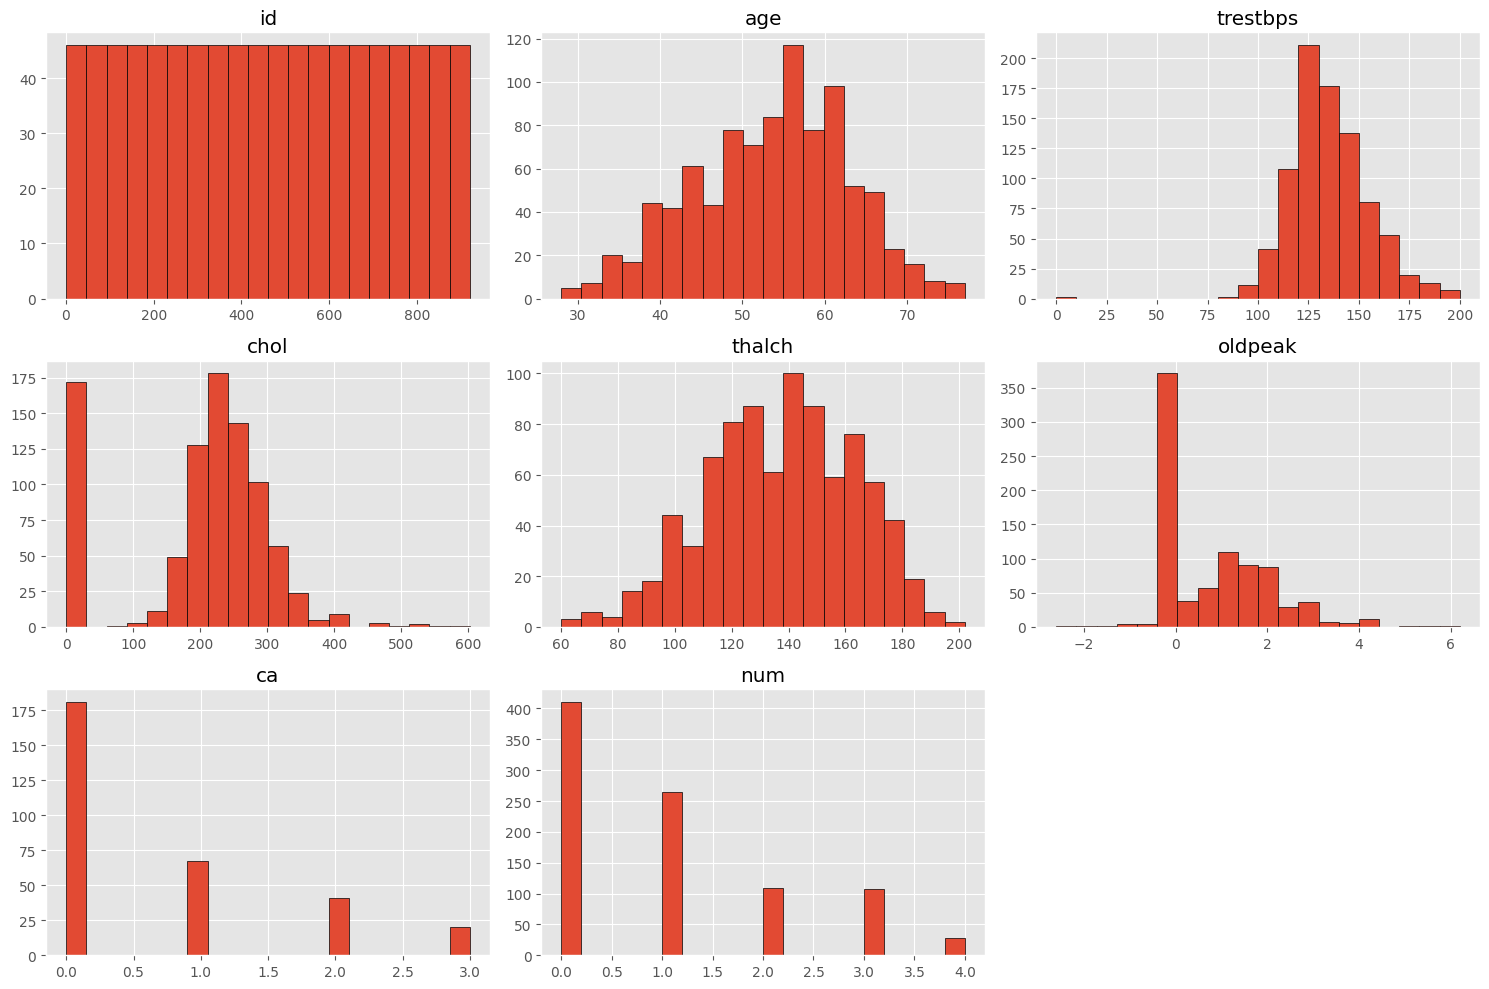

In [477]:
# Seleccionar columnas numéricas
numeric_cols = uci_data.select_dtypes(include=['float64', 'int64']).columns

# Visualizar distribuciones de las variables numéricas
print("Distribuciones de las variables numéricas:")
uci_data[numeric_cols].hist(figsize=(15, 10), bins=20, edgecolor="black")
plt.tight_layout()
plt.show()


**Resultados del Paso 3.3**:
1. Identificaremos variables con distribuciones sesgadas o que presentan valores extremos.
2. Esto nos ayudará a decidir si debemos transformar, normalizar o manejar outliers antes del modelado.


---

**Resultados del Paso 3.3**:
1. **Variables con distribuciones aparentemente normales:**
   - `age`: Distribución parecida a una normal, centrada alrededor de los 50-60 años.
   - `thalch`: Frecuencia cardiaca máxima también muestra una distribución mas o menos simétrica.

2. **Variables con distribuciones sesgadas:**
   - `chol`: Distribución sesgada a la derecha, con algunos valores altos fuera del rango típico.
   - `oldpeak`: Altamente sesgada hacia valores bajos (cercanos a 0), probablemente necesita una transformación.
   - `ca`: Distribución discreta con la mayoría de los valores en 0 y pocos pacientes con valores mayores.

3. **Valores extremos:**
   - `chol` y `oldpeak` podrían tener outliers que deberíamos investigar en más detalle.
   - `trestbps` tiene una distribución bastante concentrada entre 120-140 mmHg, pero hay valores extremos.

4. **Variable objetivo (`num`):**
   - Distribución desigual entre los niveles. La mayoría de los pacientes no tienen enfermedad cardíaca o presentan un diagnóstico moderado (valores bajos de `num`).
   - Esto sugiere que podríamos simplificar `num` en una clasificación binaria (enfermedad/no enfermedad) más adelante.

**Próximos pasos:**
1. Identificar y manejar outliers en variables clave (`chol`, `oldpeak`).
2. Evaluar si es necesario transformar variables sesgadas (`oldpeak`, `chol`) para mejorar su distribución.
3. Analizar la relación de las variables con la variable objetivo (`num`) para detectar patrones.


---

### Paso 3.4: Identificación de Outliers

**Objetivo**:
- Identificar valores atípicos en las variables `chol` y `oldpeak` mediante diagramas de caja (boxplots).
- Los outliers pueden distorsionar los análisis estadísticos y afectar el rendimiento de los modelos predictivos.


1. Identificaremos los valores extremos en las variables y cuántos están fuera de los rangos intercuartiles.
2. Esto nos permitirá decidir:
   - Si eliminamos los outliers.
   - Si aplicamos transformaciones para reducir su impacto.

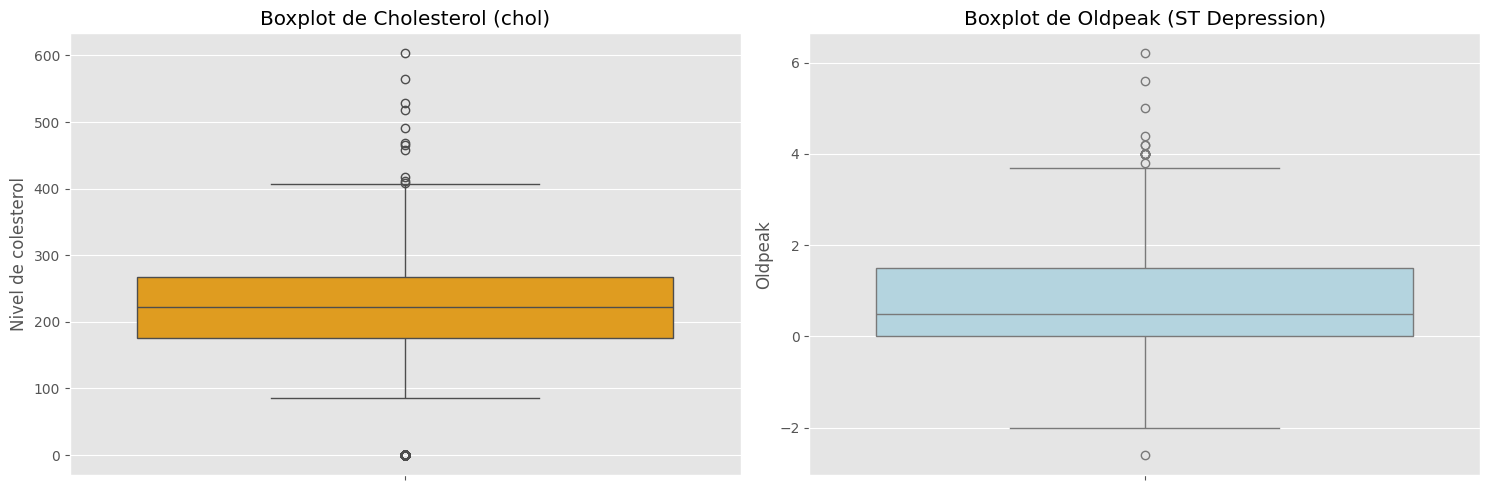

In [478]:
# Boxplots para identificar outliers en 'chol' y 'oldpeak'
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Colesterol (chol)
sns.boxplot(ax=axes[0], y=uci_data['chol'], color='orange')
axes[0].set_title('Boxplot de Cholesterol (chol)')
axes[0].set_ylabel('Nivel de colesterol')

# Depresión ST (oldpeak)
sns.boxplot(ax=axes[1], y=uci_data['oldpeak'], color='lightblue')
axes[1].set_title('Boxplot de Oldpeak (ST Depression)')
axes[1].set_ylabel('Oldpeak')

plt.tight_layout()
plt.show()


**Resultados del Paso 3.4**:
1. **Colesterol (chol):**
   - Hay valores extremos por encima de 400 mg/dl, llegando incluso a 600 mg/dl.
   - Existe un posible valor atípico por debajo de 100 mg/dl.
   - La mayoría de los datos están dentro de un rango típico (alrededor de 200-300 mg/dl).

2. **Depresión ST (oldpeak):**
   - Algunos valores extremos están por encima de 4.0.
   - La distribución está fuertemente sesgada hacia valores bajos (0-1).
   - Podría ser útil aplicar una transformación logarítmica para normalizar la distribución.

**Decisiones:**
- Verificaremos si los valores extremos están relacionados con errores de medición o si representan casos clínicos válidos.
- Evaluaremos eliminar o tratar los outliers utilizando el rango intercuartil (IQR) como criterio.



### Teoría: ¿Por qué considerar una transformación logarítmica para `oldpeak`?

#### Observación inicial de la distribución
- En el boxplot de `oldpeak`, se observa una distribución **altamente sesgada** hacia valores bajos (la mayoría de los datos están cerca de 0 o 1).
- Esta concentración en un extremo y la presencia de valores altos (outliers) sugieren que la variable tiene una distribución sesgada.

#### Problemas con distribuciones sesgadas
- Las distribuciones sesgadas pueden dificultar los análisis estadísticos y el rendimiento de los modelos de machine learning porque:
  - Muchos algoritmos (como regresiones o redes neuronales) asumen que las variables siguen una distribución más simétrica (como una normal).
  - Los valores extremos (outliers) pueden distorsionar los resultados y tener un impacto desproporcionado en los análisis.

#### Teoría detrás de la transformación logarítmica
- Las transformaciones logarítmicas se utilizan para:
  1. Reducir la amplitud de los datos (comprimir los valores más altos).
  2. Hacer que la distribución sea más simétrica.
  3. Reducir el impacto de los valores extremos (outliers).

Matemáticamente:
- Dada una variable con valores `x = [0.1, 1, 10, 100]`, la transformación `log(x)` ajusta la escala a `[-1, 0, 1, 2]`.
- Este ajuste comprime los valores grandes (por ejemplo, 100) y expande los valores pequeños (por ejemplo, 0.1).

#### Evidencia en este caso (`oldpeak`)
- La mayoría de los valores de `oldpeak` están entre 0 y 1.
- Los valores extremos (>4.0) son mucho más grandes que el resto, distorsionando la escala.
- Al aplicar una transformación logarítmica, reducimos esta diferencia, haciendo que los valores sean más comparables y mejor interpretables.

#### Consideraciones para la transformación logarítmica
- Si los datos contienen ceros, usamos `log(x + 1)` para evitar problemas (ya que `log(0)` no está definido).
- Otras transformaciones como raíz cuadrada o Box-Cox también podrían ayudar si la transformación logarítmica no es suficiente.

#### Conclusión
La transformación logarítmica puede ser útil para:
1. Normalizar la distribución de `oldpeak`.
2. Reducir el impacto de los valores extremos.
3. Mejorar el rendimiento de modelos predictivos o análisis estadísticos que dependen de distribuciones simétricas.


---

### Paso 3.5: Identificación de Outliers usando IQR


**Objetivo**:
- Utilizar el método del **rango intercuartil (IQR)** para identificar los outliers en las variables `chol` y `oldpeak`.
- Esto nos permite definir límites claros para detectar valores extremos:
  - **Límite inferior**: `Q1 - 1.5 * IQR`
  - **Límite superior**: `Q3 + 1.5 * IQR`
- Decidiremos si eliminamos estos outliers o si los tratamos de otra manera.




In [479]:
# Calcular límites del rango intercuartil (IQR) para 'chol' y 'oldpeak'
for col in ['chol', 'oldpeak']:
    Q1 = uci_data[col].quantile(0.25)  # Primer cuartil (25%)
    Q3 = uci_data[col].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1  # Rango intercuartil

    lower_bound = Q1 - 1.5 * IQR  # Límite inferior
    upper_bound = Q3 + 1.5 * IQR  # Límite superior

    print(f"{col} - IQR: {IQR:.2f}, Límite Inferior: {lower_bound:.2f}, Límite Superior: {upper_bound:.2f}")

    # Filtrar outliers
    outliers = uci_data[(uci_data[col] < lower_bound) | (uci_data[col] > upper_bound)]
    print(f"Outliers detectados en {col}: {len(outliers)}")


chol - IQR: 93.00, Límite Inferior: 35.50, Límite Superior: 407.50
Outliers detectados en chol: 183
oldpeak - IQR: 1.50, Límite Inferior: -2.25, Límite Superior: 3.75
Outliers detectados en oldpeak: 16


#### Resultados del paso 3.5
1. **Variable `chol` (Colesterol):**
   - **IQR**: 93.00.
   - **Límite inferior**: 35.50 (prácticamente no hay valores por debajo de este límite, ya que el colesterol normalmente no es tan bajo).
   - **Límite superior**: 407.50.
   - **Outliers detectados**: 183 valores por encima del límite superior (es decir, >407.50).

2. **Variable `oldpeak` (Depresión ST):**
   - **IQR**: 1.50.
   - **Límite inferior**: -2.25 (irrelevante porque no existen valores negativos de depresión ST en el dataset).
   - **Límite superior**: 3.75.
   - **Outliers detectados**: 16 valores por encima de 3.75.

#### Observaciones
1. **`chol`:**
   - El 183 de 920 valores detectados como outliers representan un porcentaje significativo (~20% del dataset). Esto sugiere que podría tratarse de datos válidos que reflejan un subgrupo clínico específico, en lugar de errores.
   - Sería conveniente investigar más antes de eliminar estos valores.

2. **`oldpeak`:**
   - Solo 16 valores son considerados outliers, lo que es más manejable.
   - Una transformación logarítmica podría ser suficiente para reducir el impacto de estos valores extremos.

#### Decisiones
1. Para `chol`:
   - Investigar si los valores >407.50 tienen sentido clínico o si son errores de medición.
   - Considerar mantenerlos si representan un subgrupo clínico válido.

2. Para `oldpeak`:
   - Aplicar una **transformación logarítmica** para reducir su impacto.
   - Mantener los outliers por ahora, pero revisar si afectan a los modelos predictivos más adelante.


### ¿Es normal tener depresión ST negativa (`oldpeak`)?

#### Definición de `oldpeak`
- **`oldpeak`** mide la **depresión del segmento ST** inducida por el ejercicio en comparación con el descanso.
- Este valor se expresa en milímetros y es un indicador importante de **isquemia** (falta de flujo sanguíneo al corazón).

#### Valores esperados
- Por lo general, los valores de `oldpeak` son **positivos**, ya que miden una **reducción** en el segmento ST durante el ejercicio.
- **Valores negativos** (elevación del segmento ST) son raros, pero pueden tener causas clínicas específicas:
  - **Elevación del ST durante ejercicio**: Puede ocurrir en casos de:
    - Infartos previos.
    - Aneurismas ventriculares.
    - Anomalías en el segmento ST.

#### ¿Es un error o un dato válido?
- Si hay pocos valores negativos, podrían ser:
  - **Errores de medición**: Más probable si el equipo no detectó correctamente el segmento ST.
  - **Casos clínicos raros**: Si los valores negativos son coherentes con otras variables del paciente, como anomalías en el ECG (`restecg`) o historial de infarto.

#### Observaciones en este dataset
- Los valores negativos en `oldpeak` están fuera de lo esperado y necesitan inspección.
- Antes de eliminarlos, es ideal:
  - Verificar si coinciden con otros indicadores clínicos.
  - Compararlos con datos relacionados como `restecg` o `cp`.

#### Decisiones posibles
1. **Eliminar los valores negativos de `oldpeak`:** Si no hay evidencia que los respalde como datos válidos.
2. **Reemplazarlos con valores nulos** y tratarlos más adelante durante el preprocesamiento.


---

### Paso 3.6: Inspección detallada de valores extremos


**Objetivo**:
1. Identificar cuántos valores negativos hay en `oldpeak` y decidir si son errores o casos clínicos raros.
2. Investigar si los valores extremos de `chol` (>407.5) tienen sentido clínico o si debemos tratarlos como outliers.


In [480]:
# Filtrar valores negativos en 'oldpeak'
negative_oldpeak = uci_data[uci_data['oldpeak'] < 0]
print(f"Cantidad de valores negativos en 'oldpeak': {len(negative_oldpeak)}")
display(negative_oldpeak)

# Filtrar valores extremos en 'chol'
extreme_chol = uci_data[uci_data['chol'] > 407.5]
print(f"\nCantidad de valores extremos en 'chol' (>407.5): {len(extreme_chol)}")
display(extreme_chol)


Cantidad de valores negativos en 'oldpeak': 12


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
603,604,38,Male,Switzerland,non-anginal,100.0,0.0,NaN,normal,179.0,False,-1.1,upsloping,NaN,NaN,0
609,610,42,Male,Switzerland,asymptomatic,105.0,0.0,NaN,normal,128.0,True,-1.5,downsloping,NaN,NaN,1
614,615,45,Male,Switzerland,non-anginal,110.0,0.0,NaN,normal,138.0,False,-0.1,upsloping,NaN,NaN,0
615,616,46,Male,Switzerland,asymptomatic,100.0,0.0,NaN,st-t abnormality,133.0,False,-2.6,flat,NaN,NaN,1
629,630,51,Male,Switzerland,asymptomatic,130.0,0.0,NaN,normal,170.0,False,-0.7,upsloping,NaN,NaN,2
653,654,56,Male,Switzerland,non-anginal,125.0,0.0,NaN,normal,98.0,False,-2.0,flat,NaN,reversable defect,2
655,656,56,Male,Switzerland,asymptomatic,115.0,0.0,NaN,st-t abnormality,82.0,False,-1.0,upsloping,NaN,NaN,1
656,657,56,Male,Switzerland,asymptomatic,120.0,0.0,False,st-t abnormality,100.0,True,-1.0,downsloping,NaN,reversable defect,2
691,692,62,Male,Switzerland,typical angina,120.0,0.0,NaN,lv hypertrophy,134.0,False,-0.8,flat,2.0,NaN,1
694,695,62,Male,Switzerland,asymptomatic,115.0,0.0,NaN,normal,72.0,True,-0.5,flat,NaN,normal,1



Cantidad de valores extremos en 'chol' (>407.5): 11


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
48,49,65,Female,Cleveland,non-anginal,140.0,417.0,True,lv hypertrophy,157.0,False,0.8,upsloping,1.0,normal,0
152,153,67,Female,Cleveland,non-anginal,115.0,564.0,False,lv hypertrophy,160.0,False,1.6,flat,0.0,reversable defect,0
181,182,56,Female,Cleveland,asymptomatic,134.0,409.0,False,lv hypertrophy,150.0,True,1.9,flat,2.0,reversable defect,2
373,374,44,Male,Hungary,asymptomatic,150.0,412.0,False,normal,170.0,False,0.0,NaN,NaN,NaN,0
434,435,53,Female,Hungary,atypical angina,113.0,468.0,NaN,normal,127.0,False,0.0,NaN,NaN,NaN,0
500,501,40,Male,Hungary,asymptomatic,120.0,466.0,NaN,normal,152.0,True,1.0,flat,NaN,fixed defect,1
528,529,32,Male,Hungary,asymptomatic,118.0,529.0,False,normal,130.0,False,0.0,NaN,NaN,NaN,1
546,547,54,Male,Hungary,asymptomatic,130.0,603.0,True,normal,125.0,True,1.0,flat,NaN,NaN,1
568,569,53,Male,Hungary,non-anginal,145.0,518.0,False,normal,130.0,False,0.0,NaN,NaN,NaN,1
584,585,44,Male,Hungary,asymptomatic,135.0,491.0,False,normal,135.0,False,0.0,NaN,NaN,NaN,1


#### Análisis de los valores negativos en oldpeak

**Resultados:**
- Hay **12 valores negativos** en la variable `oldpeak`.
- Todos los casos con valores negativos tienen:
  - Colesterol (`chol`) igual a 0.
  - Muchos valores faltantes en otras columnas (`ca`, `thal`, etc.).
  - La mayoría de los casos provienen del dataset **Switzerland**, excepto uno de **VA Long Beach**.

**Observaciones:**
- Es muy probable que los valores negativos sean **errores de medición** o registros incompletos, ya que no tienen sentido clínico junto con `chol = 0`.
- Estos registros también presentan un alto número de valores faltantes, lo que reduce su utilidad para el análisis.

**Decisión:**
- Eliminaremos los registros con `oldpeak < 0`, ya que parecen ser inconsistentes y pueden afectar el análisis.


#### Análisis de los valores extremos en chol

**Resultados:**
- Hay **11 valores extremos** en la variable `chol` (>407.5).
- La mayoría de los casos provienen del dataset **Hungary**.
- Estos valores son clínicamente posibles, ya que niveles muy altos de colesterol pueden darse en pacientes con hipercolesterolemia grave.
- Algunos de estos registros tienen valores completos y coherentes en las demás variables, lo que sugiere que no son errores.

**Observaciones:**
- Estos valores pueden reflejar subgrupos específicos (e.g., pacientes con hipercolesterolemia).
- No parecen ser errores de medición.

**Decisión:**
- Mantendremos los valores extremos en `chol`, pero los observaremos de cerca durante el modelado para evaluar su impacto.
- Si afectan significativamente el rendimiento de los modelos, podríamos considerar transformarlos o aplicar normalización.


---

### Paso 3.7: Implementación de las decisiones para oldpeak y chol

**Objetivo**:
1. **Eliminar valores negativos en `oldpeak`**:
   - Estos valores no tienen sentido clínico y están asociados con otros problemas en los datos (e.g., `chol = 0` y valores faltantes).
   - Eliminarlos mejorará la calidad del dataset.

2. **Mantener los valores extremos en `chol`**:
   - Los valores >407.5 son posibles clínicamente (hipercolesterolemia grave) y no parecen ser errores de medición.
   - Serán observados durante el modelado para evaluar su impacto.

**Pasos a realizar**:
1. Filtrar y eliminar registros con `oldpeak < 0`.
2. Confirmar que los valores extremos en `chol` se mantienen en el dataset.


In [481]:
# Eliminar valores negativos en 'oldpeak'
uci_data = uci_data[uci_data['oldpeak'] >= 0]
print(f"Registros después de eliminar oldpeak negativos: {uci_data.shape[0]}")

# Confirmar que los valores extremos de 'chol' se mantienen
extreme_chol = uci_data[uci_data['chol'] > 407.5]
print(f"Cantidad de valores extremos en 'chol' después del filtrado: {len(extreme_chol)}")


Registros después de eliminar oldpeak negativos: 846
Cantidad de valores extremos en 'chol' después del filtrado: 11


#### Resultados
1. **Registros eliminados:**
   - Los 12 registros con valores negativos en `oldpeak` fueron eliminados.
   - Esto redujo el dataset de **920 registros** a **846 registros**.

2. **Valores extremos en `chol`:**
   - Los 11 valores extremos (colesterol > 407.5) se han mantenido en el dataset.
   - Estos datos serán revisados durante el modelado para garantizar que no afecten negativamente el rendimiento.

#### Observaciones
- La eliminación de valores negativos en `oldpeak` mejora la calidad del dataset y elimina posibles inconsistencias.
- Los valores extremos en `chol` reflejan subgrupos clínicamente relevantes y se dejan intactos para análisis futuros.

---

### Paso 3.8: Transformación Logarítmica de oldpeak

**Objetivo**:
- Aplicar una transformación logarítmica a la variable `oldpeak` para:
  1. Reducir su sesgo hacia valores bajos.
  2. Hacer que la distribución sea más simétrica.
  3. Reducir el impacto de valores extremos en los análisis y modelos.

**Teoría**:
- La transformación logarítmica es útil para variables con sesgo positivo.
- Fórmula: `log(x + 1)`, donde se suma 1 para manejar valores de `x = 0`.

**Pasos a realizar**:
1. Aplicar la transformación logarítmica a `oldpeak`.
2. Comparar la distribución antes y después de la transformación.


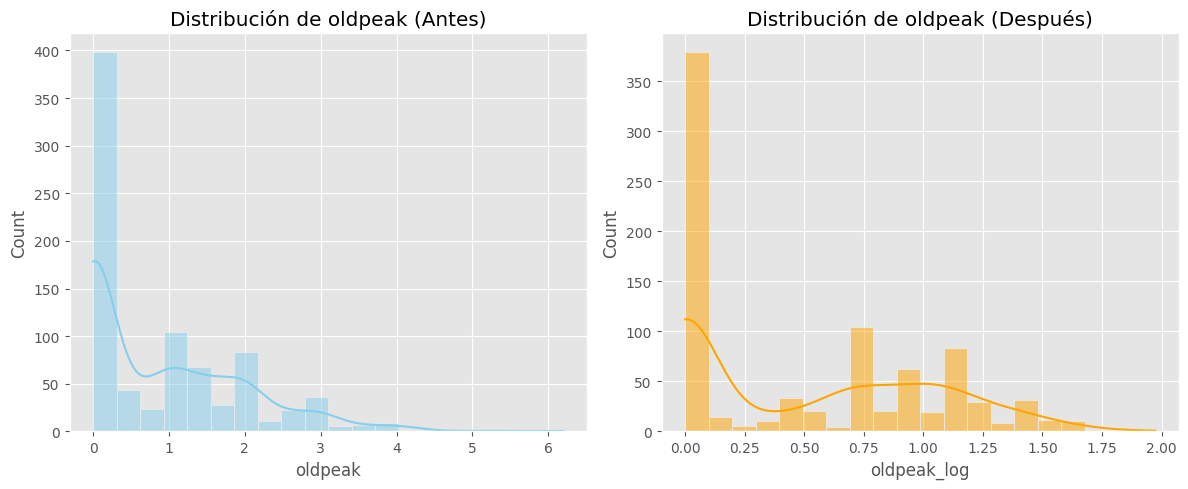

In [482]:
# Comparar distribuciones antes y después de la transformación
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Antes de la transformación
sns.histplot(uci_data['oldpeak'], bins=20, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title('Distribución de oldpeak (Antes)')

# Aplicar transformación logarítmica
uci_data['oldpeak_log'] = np.log1p(uci_data['oldpeak'])

# Después de la transformación
sns.histplot(uci_data['oldpeak_log'], bins=20, kde=True, color="orange", ax=axes[1])
axes[1].set_title('Distribución de oldpeak (Después)')

plt.tight_layout()
plt.show()


### Paso 3.8: Transformación Logarítmica de `oldpeak`

#### Resultados
1. **Distribución antes de la transformación:**
   - La variable `oldpeak` presenta una distribución altamente sesgada hacia valores bajos.
   - La mayoría de los datos se concentran en el rango de 0 a 1, con una caída rápida hacia valores más altos.

2. **Distribución después de la transformación:**
   - La transformación logarítmica ha reducido significativamente el sesgo de la distribución.
   - Aunque sigue siendo asimétrica, la escala comprimida permite trabajar mejor con los datos y minimizar el impacto de los valores extremos.

#### Observaciones
- La transformación ha normalizado parcialmente la variable, haciéndola más adecuada para análisis estadísticos y modelado.
- La nueva variable, `oldpeak_log`, será utilizada en lugar de `oldpeak` para futuros análisis y modelos.

#### Decisión
- Sustituir `oldpeak` por `oldpeak_log` en el dataset para análisis posteriores.


In [483]:
# Sustituir oldpeak por la versión transformada
uci_data.drop(columns=['oldpeak'], inplace=True)  # Eliminar la versión original
uci_data.rename(columns={'oldpeak_log': 'oldpeak'}, inplace=True)  # Renombrar la transformada
print("Sustitución completada. Usaremos la variable transformada 'oldpeak' en futuros análisis.")


Sustitución completada. Usaremos la variable transformada 'oldpeak' en futuros análisis.


### Paso 3.9. Transformar variables categóricas

Para solucionar el problema de trabajar con variables categóricas en un análisis de correlación y asegurar que los valores faltantes puedan ser evaluados correctamente, convertiremos las variables categóricas en binarias o dummy variables.

**Objetivo**

Convertir variables categóricas a formato numérico para incluirlas en el análisis de correlación. Asegurar que todas las variables sean interpretables por los métodos estadísticos.

**Pasos a realizar:**

1. Identificar las variables categóricas.
2. Aplicar transformación a variables categóricas mediante:
    - Codificación binaria (para variables con 2 categorías).
    - Dummies (para variables con más de 2 categorías).
3. Repetir el análisis de valores faltantes.

In [484]:
# Identificar las variables categóricas
categorical_vars = uci_data.select_dtypes(include=['object']).columns
print("Variables categóricas:", categorical_vars.tolist())

# Convertir variables categóricas a formato numérico
uci_data_encoded = pd.get_dummies(uci_data, columns=categorical_vars, drop_first=True)






Variables categóricas: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


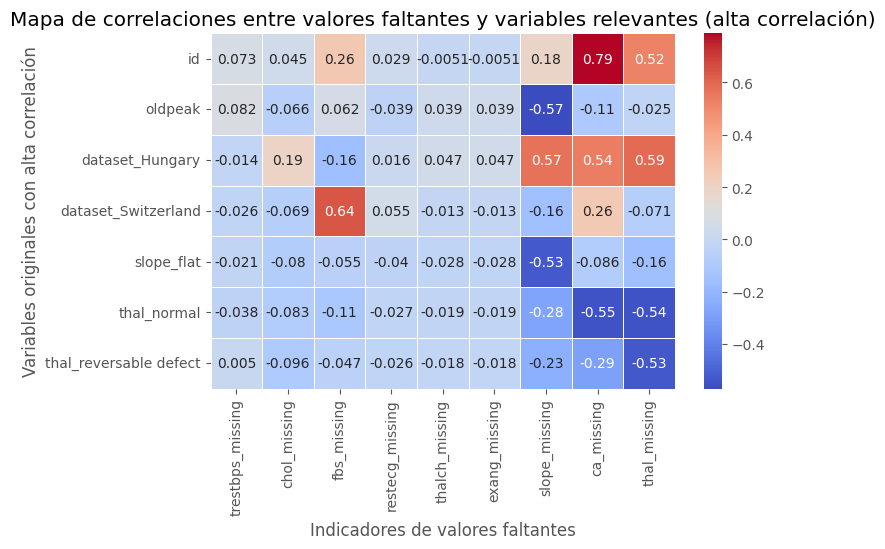

In [485]:
# Filtrar indicadores de valores faltantes con algún valor NaN
missing_indicators = uci_data.isnull().astype(int).add_suffix('_missing')
data_with_missing_encoded = pd.concat([uci_data_encoded, missing_indicators], axis=1)

# Filtrar indicadores de valores faltantes para análisis
filtered_missing_indicators = missing_indicators.loc[:, missing_indicators.sum() > 0].columns

# Calcular correlaciones entre todas las variables
correlations_all = data_with_missing_encoded.corr()

# Filtrar correlaciones con valores faltantes
correlations_missing_only = correlations_all[filtered_missing_indicators].drop(filtered_missing_indicators, axis=0)

# Filtrar únicamente correlaciones con valores absolutos mayores a un umbral (alta correlación)
threshold = 0.5
high_correlation = correlations_missing_only[(correlations_missing_only.abs() > threshold).any(axis=1)]

# Generar el mapa de calor con las correlaciones relevantes
plt.figure(figsize=(8, len(high_correlation) * 0.8))
sns.heatmap(high_correlation, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Mapa de correlaciones entre valores faltantes y variables relevantes (alta correlación)')
plt.xlabel('Indicadores de valores faltantes')
plt.ylabel('Variables originales con alta correlación')
plt.tight_layout()
plt.show()



---

## Paso 4: Análisis Exploratorio de Datos (EDA)


**Objetivo**:
1. Investigar las relaciones entre las variables y la variable objetivo (`num`).
2. Responder preguntas clave como:
   - ¿Cómo se distribuyen las categorías de `cp`, `restecg`, y `thal` según `num`?
   - ¿Existen diferencias significativas en variables numéricas (`age`, `chol`, `oldpeak`) entre pacientes con y sin enfermedad cardíaca?
3. Visualizar patrones que puedan influir en el modelado.

**Pasos a realizar**:
1. Visualización de la distribución de la variable objetivo (`num`).
2. Análisis de variables categóricas con respecto a `num`.
3. Análisis de variables numéricas con respecto a `num`.


C:\Users\sopor\AppData\Local\Temp\ipykernel_5984\3183977934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=uci_data, x='num', palette='viridis')


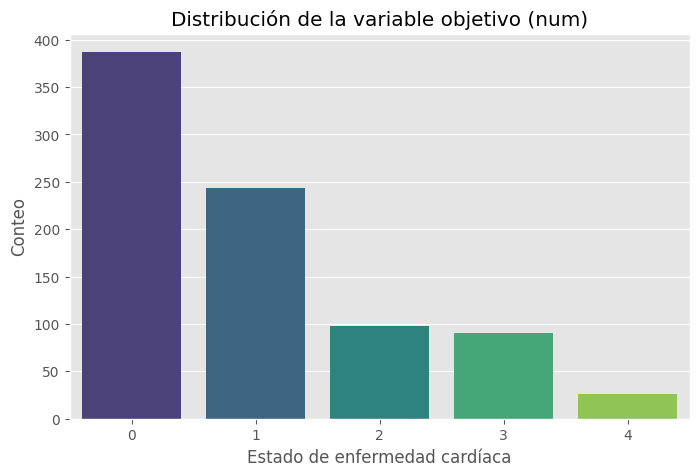

In [486]:
# Visualizar la distribución de la variable objetivo
plt.figure(figsize=(8, 5))
sns.countplot(data=uci_data, x='num', palette='viridis')
plt.title('Distribución de la variable objetivo (num)')
plt.xlabel('Estado de enfermedad cardíaca')
plt.ylabel('Conteo')
plt.show()


### Paso 4.1: Distribución de la variable objetivo `num`

#### Resultados
1. **Distribución observada:**
   - Nivel 0 (sin enfermedad): Es el grupo mayoritario, con aproximadamente 400 pacientes.
   - Niveles 1, 2, 3 y 4 (enfermedad en distintos grados): Están distribuidos desigualmente, siendo el nivel 1 el más frecuente entre ellos.

2. **Desequilibrio en la distribución:**
   - Existe un desequilibrio importante, ya que el nivel 0 representa la mayor proporción.
   - Los niveles más altos (2, 3, 4) tienen menos datos, lo que puede dificultar la predicción precisa de estos casos.

#### Observaciones
- Dada esta distribución, podría ser conveniente simplificar la variable objetivo a una **clasificación binaria**:
  - 0: Sin enfermedad.
  - 1: Con enfermedad (niveles 1, 2, 3, y 4 combinados).
- Esto ayudaría a balancear las clases y simplificar el modelado. Además en el objetivo se indica que buscamos clasificar para 0 - Sin enfermedad o 1 - Con enfermedad, asi que esta aproximación es necesaria.

#### Decisión
- **Reclasificaremos `num` a una variable binaria** para análisis y modelado:
  - 0: Sin enfermedad.
  - 1: Con enfermedad.


C:\Users\sopor\AppData\Local\Temp\ipykernel_5984\2764529964.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=uci_data, x='num', palette='viridis')


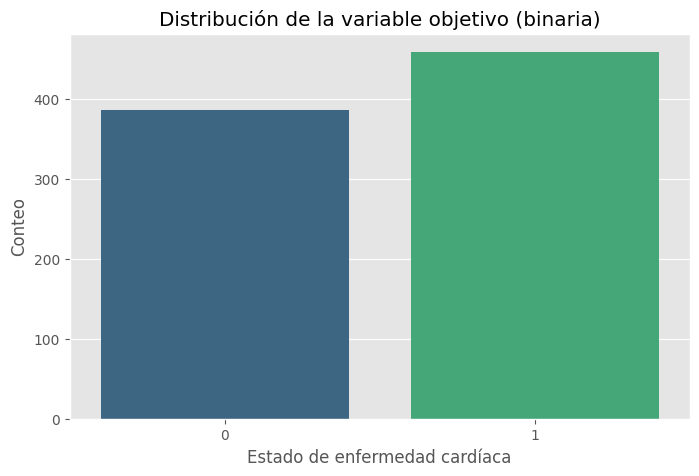

In [487]:
# Reclasificar 'num' como binaria: 0 = Sin enfermedad, 1 = Con enfermedad
uci_data['num'] = (uci_data['num'] > 0).astype(int)

# Verificar la nueva distribución
plt.figure(figsize=(8, 5))
sns.countplot(data=uci_data, x='num', palette='viridis')
plt.title('Distribución de la variable objetivo (binaria)')
plt.xlabel('Estado de enfermedad cardíaca')
plt.ylabel('Conteo')
plt.show()


### Paso 4.2: Reclasificación de la variable objetivo `num`

#### Resultados
1. **Distribución binaria observada:**
   - **0 (sin enfermedad):** Aproximadamente 400 pacientes.
   - **1 (con enfermedad):** Aproximadamente 450 pacientes.
   - La reclasificación ha generado un dataset más equilibrado entre las dos clases.

2. **Impacto de la reclasificación:**
   - Ahora la variable `num` es más manejable para análisis y modelos, ya que representa solo dos clases.
   - Este balance relativo evitará problemas como el sesgo hacia la clase mayoritaria durante el entrenamiento de los modelos.

#### Observaciones
- Este nuevo formato será utilizado para análisis posteriores y modelado.
- Permite simplificar y hacer más robusto el análisis predictivo.


---

### Próximo paso: Relación entre variables categóricas y num


**Objetivo**:
- Analizar cómo las categorías de variables como `cp`, `restecg`, y `thal` se distribuyen entre pacientes con y sin enfermedad cardíaca (`num`).
- Esto nos ayudará a identificar posibles predictores importantes.


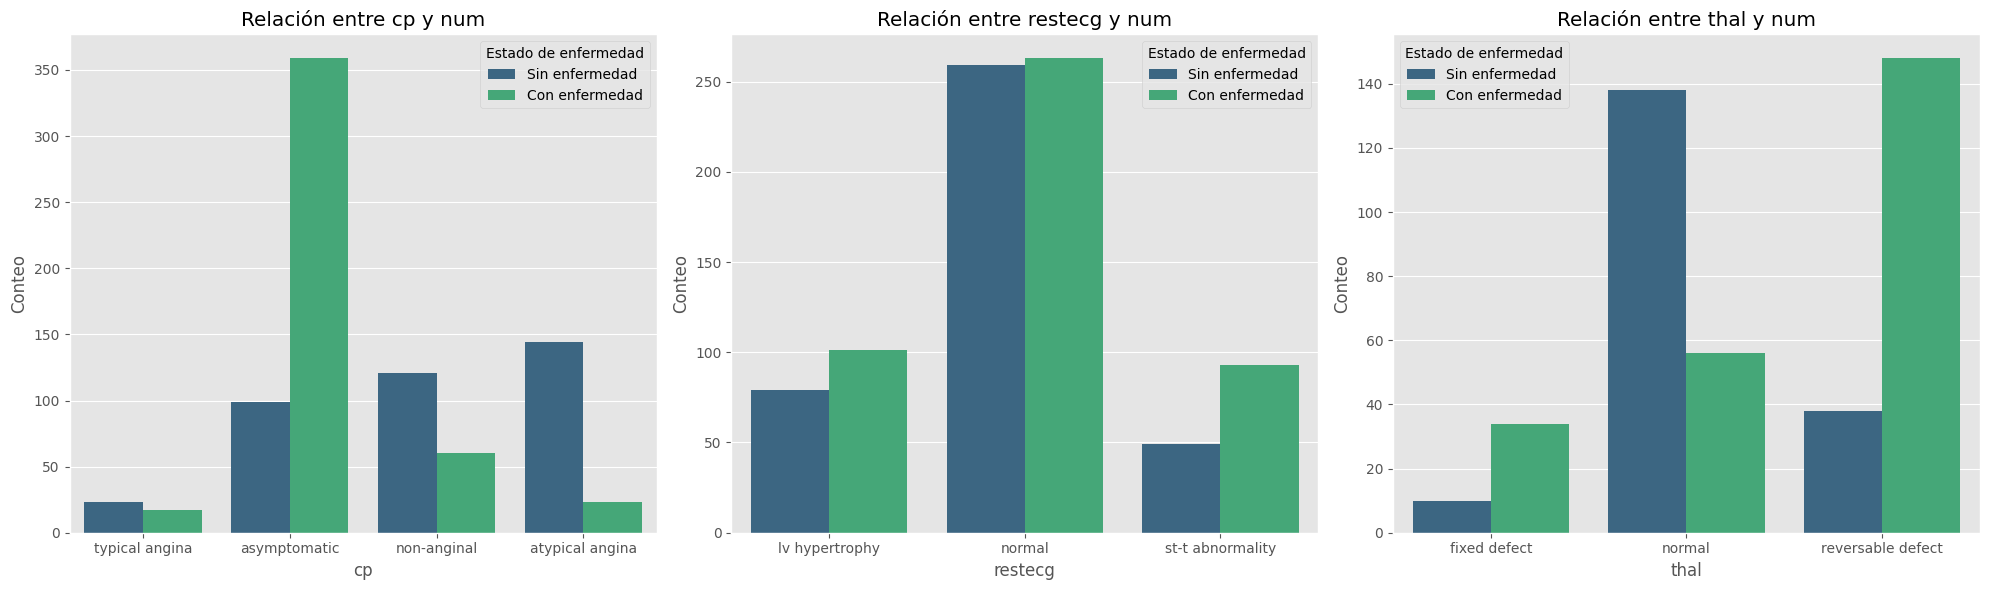

In [488]:
# Crear subplots para las variables categóricas
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Variables categóricas
categorical_vars = ['cp', 'restecg', 'thal']

# Iterar sobre las variables y asignarlas a los subplots
for i, var in enumerate(categorical_vars):
    sns.countplot(data=uci_data, x=var, hue='num', palette='viridis', ax=axes[i])
    axes[i].set_title(f'Relación entre {var} y num')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Conteo')
    axes[i].legend(title='Estado de enfermedad', labels=['Sin enfermedad', 'Con enfermedad'])

plt.tight_layout()
plt.show()


### Paso 4.3: Relación entre variables categóricas y la variable objetivo (`num`)

#### Resultados
1. **Relación entre `cp` (tipo de dolor de pecho) y `num`:**
   - La categoría "asymptomatic" está claramente asociada con pacientes que tienen enfermedad cardíaca.
   - Las categorías "typical angina" y "non-anginal" están más presentes en pacientes sin enfermedad cardíaca.

2. **Relación entre `restecg` (resultados del ECG en reposo) y `num`:**
   - Los resultados "st-t abnormality" están fuertemente asociados con la presencia de enfermedad cardíaca.
   - Los pacientes con un ECG "normal" están balanceados entre los que tienen y no tienen enfermedad.

3. **Relación entre `thal` (estado del corazón según la prueba de talio) y `num`:**
   - La categoría "reversible defect" está predominantemente asociada con la presencia de enfermedad cardíaca.
   - Los pacientes con un estado "normal" están balanceados entre ambos grupos.
   - "Fixed defect" está menos representado, pero mayormente asociado con la enfermedad.

#### Observaciones
- Estas visualizaciones muestran patrones claros que pueden ser útiles para el modelado.
- Las variables `cp`, `restecg`, y `thal` parecen ser buenos predictores de la presencia de enfermedad cardíaca.


### Paso 4.4: Relación entre variables numéricas y num


**Objetivo**:
- Visualizar y analizar las distribuciones de variables numéricas en función de la variable objetivo (`num`).
- Identificar si existen diferencias significativas entre los pacientes con y sin enfermedad cardíaca.

**Pasos a realizar**:
1. Crear gráficos de violín para observar la distribución de cada variable numérica según `num`.
2. Evaluar diferencias en las medianas y la dispersión.


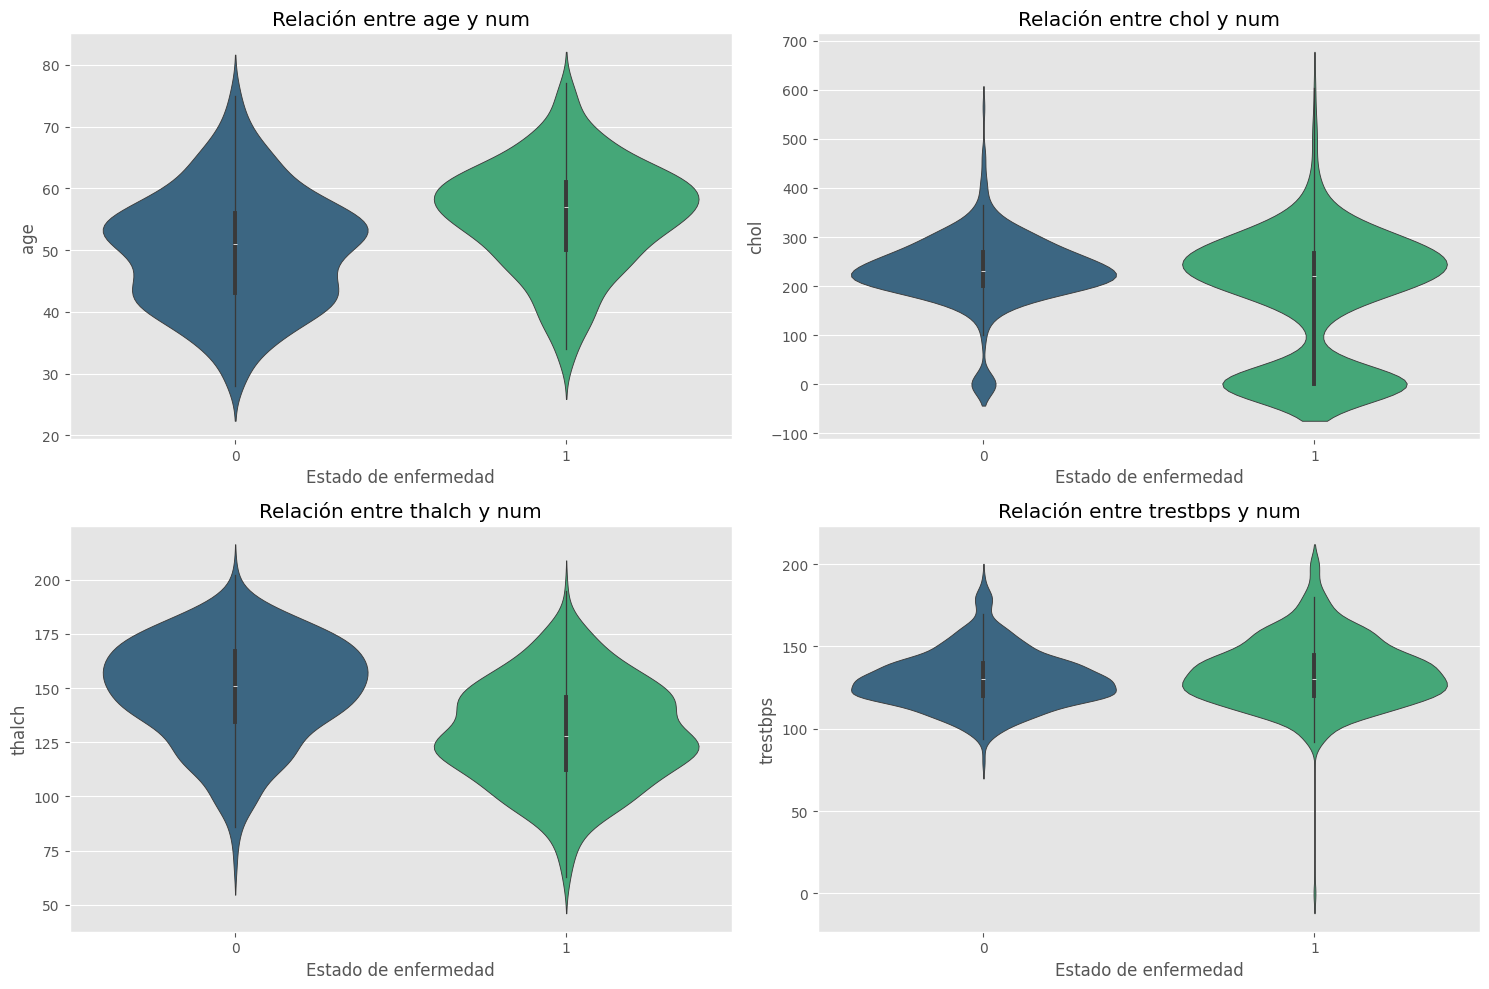

In [489]:
# Variables numéricas corregidas
numeric_vars = ['age', 'chol', 'thalch', 'trestbps']

# Crear subplots para las variables numéricas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Iterar sobre las variables y asignarlas a los subplots
for i, var in enumerate(numeric_vars):
    row, col = divmod(i, 2)  # Calcular la posición del subplot
    sns.violinplot(data=uci_data, x='num', y=var, hue='num', palette='viridis', dodge=False, ax=axes[row, col])
    axes[row, col].set_title(f'Relación entre {var} y num')
    axes[row, col].set_xlabel('Estado de enfermedad')
    axes[row, col].set_ylabel(var)
    axes[row, col].legend([],[], frameon=False)  # Eliminar la leyenda duplicada

plt.tight_layout()
plt.show()



#### Resultados
1. **Relación entre `age` y `num`:**
   - Los pacientes con enfermedad (`num = 1`) tienden a estar en un rango de edad similar a los pacientes sin enfermedad (`num = 0`). Aunque se pueden observar un rango mayor de pacientes con edades inferiores a 50 sin enfermedad
   - No parece haber diferencias claras en la distribución de la edad.

2. **Relación entre `chol` y `num`:**
   - Hay un rango amplio de colesterol en ambos grupos, pero la mediana de pacientes con enfermedad es mayor.
   - Existen valores extremos en el grupo con enfermedad.

3. **Relación entre `thalch` (frecuencia cardíaca máxima) y `num`:**
   - Los pacientes sin enfermedad (`num = 0`) tienden a tener frecuencias cardíacas máximas más altas en comparación con los pacientes con enfermedad.
   - Esto podría ser un indicador relevante para el diagnóstico.

4. **Relación entre `trestbps` (presión arterial en reposo) y `num`:**
   - Ambas distribuciones son similares, aunque los pacientes con enfermedad tienen una mayor dispersión.
   - No parece haber una diferencia significativa en la mediana entre los dos grupos.

#### Observaciones
- La variable `thalch` muestra una tendencia clara que podría ser útil como predictor.
- `chol` también podría ser relevante, aunque su relación es menos pronunciada.
- Variables como `age` y `trestbps` no muestran diferencias claras entre los grupos y podrían tener menor importancia en el modelo.

#### Decisión
- Estas observaciones se tendrán en cuenta para la selección de predictores clave en el modelado.


---

### Paso 4.5: Decisiones sobre valores extremos y dispersión


**Objetivo**:
- Evaluar qué hacer con las distribuciones que tienen alta dispersión o valores extremos.
- Tomar decisiones fundamentadas, como:
  1. Sustitución de valores extremos con límites del IQR.
  2. Dejar los valores extremos si son clínicamente relevantes.

**Pasos a realizar**:
1. Analizar las variables numéricas con alta dispersión (`chol`, `thalch`, `trestbps`).
2. Decidir el tratamiento de los valores extremos según la relevancia clínica.


In [490]:
# Calcular los límites del IQR para cada variable numérica
iqr_results = {}
for var in ['chol', 'thalch', 'trestbps']:
    Q1 = uci_data[var].quantile(0.25)
    Q3 = uci_data[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = uci_data[(uci_data[var] < lower_bound) | (uci_data[var] > upper_bound)].shape[0]
    iqr_results[var] = {'IQR': IQR, 'Lower': lower_bound, 'Upper': upper_bound, 'Outliers': outliers}

# Mostrar los resultados
iqr_df = pd.DataFrame(iqr_results).T
iqr_df


,IQR,Lower,Upper,Outliers
chol,87.0,51.5,399.5,158.0
thalch,37.0,64.5,212.5,2.0
trestbps,20.0,90.0,170.0,28.0


#### Resultados del IQR
1. **`chol` (colesterol sérico):**
   - IQR: 87.0
   - Límite inferior: 51.5
   - Límite superior: 399.5
   - Valores extremos detectados: **158**

2. **`thalch` (frecuencia cardíaca máxima):**
   - IQR: 37.0
   - Límite inferior: 64.5
   - Límite superior: 212.5
   - Valores extremos detectados: **2**

3. **`trestbps` (presión arterial en reposo):**
   - IQR: 20.0
   - Límite inferior: 90.0
   - Límite superior: 170.0
   - Valores extremos detectados: **28**

#### Observaciones
- La variable `chol` tiene un número considerable de valores extremos (158). Esto podría deberse a mediciones muy altas que son clínicamente posibles, pero también a errores.
- `thalch` tiene solo 2 valores extremos, así no es una gran preocupación.
- `trestbps` tiene 28 valores extremos, lo que podría requerir atención dependiendo de su relevancia clínica.


---

### Paso 4.6: Tratamiento de valores atípicos inferiores de Chol


**Objetivo**:
- Analizar los valores atípicos inferiores y superiores en la variable `chol` y decidir qué hacer con ellos.
- Justificar cada decisión basándonos en:
  1. Relevancia clínica de los valores extremos.
  2. Completitud y calidad de los datos relacionados.

**Fundamento teórico**:
- Los valores extremadamente bajos de colesterol (inferiores a 51.5) podrían reflejar errores de medición o condiciones clínicas muy raras.
- Los valores extremadamente altos de colesterol (superiores a 399.5) suelen ser clínicamente relevantes, pero debemos confirmar si se relacionan con otras características del dataset.
- Métodos comunes para manejar outliers:
  - **Imputación:** Sustituir valores extremos por límites del IQR.
  - **Eliminación:** Quitar registros si se consideran errores o datos no representativos.
  - **Mantener:** Dejar los valores si son relevantes para el análisis.

**Decisión**:
- Analizaremos las distribuciones de estos valores extremos junto con otras variables relevantes.
- Basándonos en los resultados, decidiremos si imputar, eliminar o mantener los valores atípicos.



In [491]:
# Filtrar valores extremos en `chol`
chol_outliers_lower = uci_data[uci_data['chol'] < 51.5]
chol_outliers_upper = uci_data[uci_data['chol'] > 399.5]

# Ver valores unicos en chol_outliers_lower
print("Valores únicos en chol_outliers_lower:")
display(chol_outliers_lower['chol'].unique())

# Ver valores unicos en chol_outliers_upper
print("\nValores únicos en chol_outliers_upper:")
display(chol_outliers_upper['chol'].unique())




Valores únicos en chol_outliers_lower:


array([0.])


Valores únicos en chol_outliers_upper:


array([417., 407., 564., 409., 412., 468., 466., 529., 603., 404., 518.,
       491., 458.])

Estadísticas descriptivas de valores atípicos inferiores en 'chol':


,id,age,trestbps,chol,thalch,ca,num,oldpeak
count,145.000000,145.000000,143.000000,145.0,145.000000,5.00000,145.000000,145.000000
mean,688.434483,56.248276,130.657343,0.0,122.779310,1.20000,0.903448,0.561750
std,57.173325,8.330442,24.128209,0.0,24.009104,0.83666,0.296370,0.491549
min,598.000000,32.000000,0.000000,0.0,60.000000,0.00000,0.000000,0.000000
25%,642.000000,52.000000,115.000000,0.0,108.000000,1.00000,1.000000,0.000000
50%,681.000000,58.000000,128.000000,0.0,121.000000,1.00000,1.000000,0.693147
75%,732.000000,61.000000,145.000000,0.0,140.000000,2.00000,1.000000,0.993252
max,823.000000,74.000000,200.000000,0.0,182.000000,2.00000,1.000000,1.547563



Estadísticas descriptivas de valores atípicos superiores en 'chol':


,id,age,trestbps,chol,thalch,ca,num,oldpeak
count,13.000000,13.000000,13.000000,13.000000,13.000000,4.000000,13.000000,13.000000
mean,416.461538,52.384615,132.461538,472.769231,137.153846,1.500000,0.615385,0.568885
std,224.967263,10.177905,12.745034,65.213948,25.559884,1.290994,0.506370,0.534128
min,49.000000,32.000000,113.000000,404.000000,69.000000,0.000000,0.000000,0.000000
25%,182.000000,44.000000,120.000000,412.000000,127.000000,0.750000,0.000000,0.000000
50%,501.000000,53.000000,134.000000,466.000000,135.000000,1.500000,1.000000,0.693147
75%,567.000000,58.000000,140.000000,518.000000,154.000000,2.250000,1.000000,0.955511
max,801.000000,67.000000,150.000000,603.000000,170.000000,3.000000,1.000000,1.609438


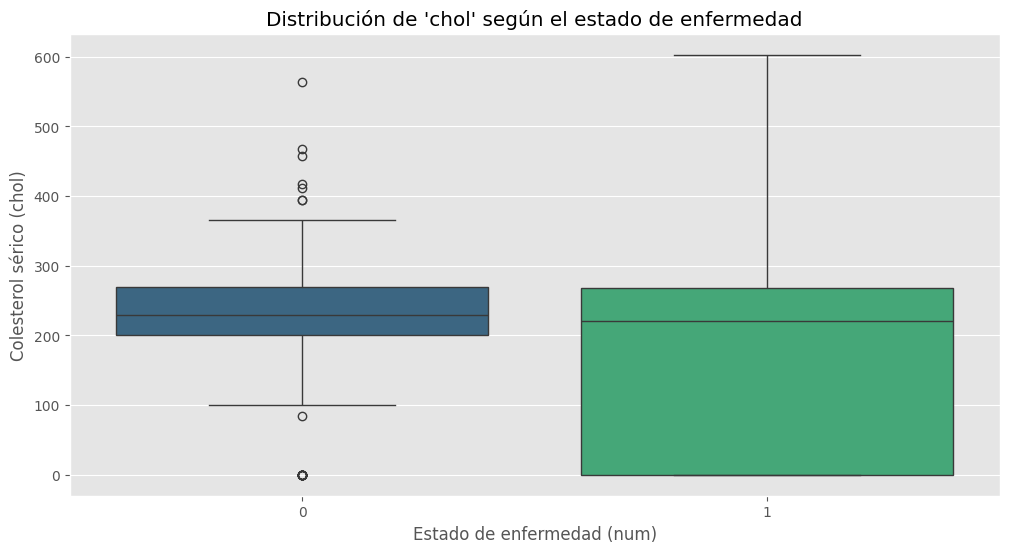

In [492]:
# Mostrar estadísticas descriptivas de los valores extremos
print("Estadísticas descriptivas de valores atípicos inferiores en 'chol':")
display(chol_outliers_lower.describe())

print("\nEstadísticas descriptivas de valores atípicos superiores en 'chol':")
display(chol_outliers_upper.describe())

# Visualizar distribuciones de valores extremos
plt.figure(figsize=(12, 6))
sns.boxplot(data=uci_data, x='num', y='chol', hue='num', palette='viridis', legend=False)
plt.title("Distribución de 'chol' según el estado de enfermedad")
plt.xlabel("Estado de enfermedad (num)")
plt.ylabel("Colesterol sérico (chol)")
plt.show()

**Valores atípicos inferiores (chol < 51.5):**
- **Estadísticas generales:**
  - **Mínimo:** 0, lo cual es improbable desde el punto de vista clínico.
  - **Mediana (50%):** 128, lo que sugiere que la mayoría de los valores están dentro de un rango razonable.
  - **Conteo total:** 145 valores atípicos inferiores.

- **Observaciones relevantes:**
  - Los valores de `chol` en 0 parecen errores de medición.
  - El resto de valores atípicos inferiores (por encima de 51.5 pero dentro del rango clínico) podrían mantenerse.

**Valores atípicos superiores (chol > 399.5):**
- **Estadísticas generales:**
  - **Mínimo:** 404, un rango elevado pero clínicamente plausible.
  - **Máximo:** 603, extremadamente alto pero no necesariamente un error.
  - **Conteo total:** 13 valores atípicos superiores.

- **Observaciones relevantes:**
  - La distribución muestra que estos valores extremos están asociados a ambos grupos (`num = 0` y `num = 1`).
  - Dado que son clínicamente posibles, podrían mantenerse en el análisis.



---

**Objetivo:**
- Identificar cuántos registros se verían afectados (eliminados o marcados como `NaN`).
- Explorar el impacto de mantener o eliminar los valores atípicos.
- Tomar decisiones informadas sobre si imputar, eliminar o conservar.

**Fundamento teórico:**
- Marcar valores extremos como `NaN` nos permite diferenciarlos de otros datos y considerar imputaciones.
- Analizar el impacto de los valores atípicos garantiza que no perdamos información clave.


In [493]:
# Marcar valores extremos inferiores y superiores como NaN
uci_data['chol_cleaned'] = uci_data['chol'].apply(
    lambda x: np.nan if x < 51.5 else x
)

# Contar registros marcados como NaN
num_atipicos_inferiores = uci_data['chol'][uci_data['chol'] < 51.5].count()

print(f"Valores atípicos marcados como NaN:")
print(f"- Inferiores (< 51.5): {num_atipicos_inferiores}")


# Verificar proporción de datos faltantes después del marcaje
missing_proportion = uci_data['chol_cleaned'].isna().mean() * 100
print(f"\nProporción de datos marcados como NaN en 'chol': {missing_proportion:.2f}%")

# Mostrar resumen del dataset tras el marcaje
print("\nEstadísticas tras marcar valores extremos:")
display(uci_data['chol_cleaned'].describe())


Valores atípicos marcados como NaN:
- Inferiores (< 51.5): 145

Proporción de datos marcados como NaN en 'chol': 20.33%

Estadísticas tras marcar valores extremos:


count    674.000000
mean     247.268546
std       58.695482
min       85.000000
25%      210.250000
50%      240.000000
75%      276.000000
max      603.000000
Name: chol_cleaned, dtype: float64

1. **Valores atípicos marcados como NaN:**
   - Se han identificado 145 valores atípicos inferiores (todos `chol = 0`) y se han marcado como NaN.
   - Esto representa un **20.33%** del total de registros, lo que es un porcentaje significativo.

2. **Estadísticas tras el marcaje:**
   - **Rango de valores válidos (`chol_cleaned`):**
     - Mínimo: 85 (valor más bajo después de marcar los NaN).
     - Máximo: 603 (valor más alto, que permanece válido).
   - La media y los percentiles parecen razonables, lo que sugiere que la distribución sigue siendo representativa para análisis.

3. **Proporción de valores faltantes:**
   - Tener un 20.33% de valores marcados como NaN en `chol` puede ser problemático si no se maneja adecuadamente antes del modelado.



---

### Paso 4.5.4: Evaluación de estrategias de imputación para chol_cleaned


**Objetivo:**
- Comparar varias estrategias de imputación para los valores faltantes en `chol_cleaned`.
- Elegir la mejor estrategia basándonos en cómo afecta la distribución de los datos.

**Estrategias comunes de imputación:**
1. **Imputación con la media:**
   - Ventaja: Mantiene el promedio general de la variable.
   - Desventaja: Puede distorsionar la distribución si hay valores extremos.
2. **Imputación con la mediana:**
   - Ventaja: Menos afectada por valores extremos.
   - Desventaja: No tiene en cuenta las relaciones entre variables.
3. **Imputación basada en regresión:**
   - Ventaja: Usa otras variables para estimar valores faltantes.
   - Desventaja: Más compleja y puede introducir sesgos si las relaciones no son fuertes.
4. **Imputación basada en el vecino más cercano (KNN):**
   - Ventaja: Considera patrones en los datos similares.
   - Desventaja: Computacionalmente más costosa y sensible a la selección de `k`.

**Fundamento teórico:**
- Evaluaremos cómo cada estrategia afecta la distribución de `chol_cleaned`.
- Compararemos las distribuciones imputadas con la original (antes de eliminar valores atípicos) para decidir cuál mantiene mejor las características de los datos.




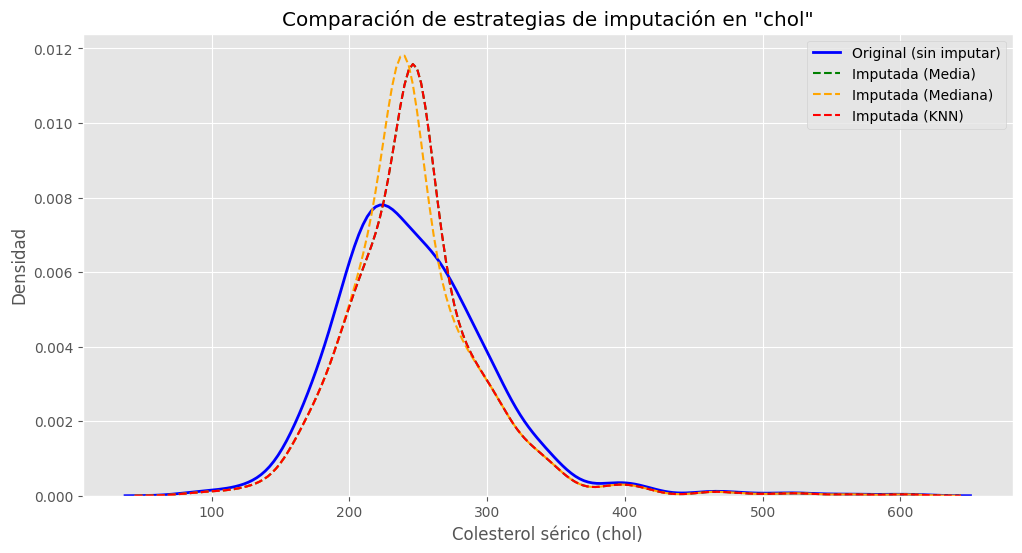

In [494]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression

# Imputación con la media
uci_data['chol_mean'] = uci_data['chol_cleaned'].fillna(uci_data['chol_cleaned'].mean())

# Imputación con la mediana
uci_data['chol_median'] = uci_data['chol_cleaned'].fillna(uci_data['chol_cleaned'].median())

# Imputación basada en KNN (usaremos K=5)
knn_imputer = KNNImputer(n_neighbors=5)
uci_data['chol_knn'] = knn_imputer.fit_transform(uci_data[['chol_cleaned']])

# Visualización de distribuciones imputadas
plt.figure(figsize=(12, 6))
sns.kdeplot(uci_data['chol_cleaned'], label='Original (sin imputar)', color='blue', linewidth=2)
sns.kdeplot(uci_data['chol_mean'], label='Imputada (Media)', color='green', linestyle='--')
sns.kdeplot(uci_data['chol_median'], label='Imputada (Mediana)', color='orange', linestyle='--')
sns.kdeplot(uci_data['chol_knn'], label='Imputada (KNN)', color='red', linestyle='--')
plt.title('Comparación de estrategias de imputación en "chol"')
plt.xlabel('Colesterol sérico (chol)')
plt.ylabel('Densidad')
plt.legend()
plt.show()



### Paso 5. Missing Values

Como la curtosis cambia muchisimo, vamos a observar el resto de variables y us valores faltantes, Iremos tratando cada variable desde las que menos NaN tienen a las que mas.




Variables con valores faltantes y su proporción:


exang           0.001182
thalch          0.001182
restecg         0.002364
trestbps        0.004728
chol            0.031915
fbs             0.089835
chol_cleaned    0.203310
slope           0.291962
thal            0.498818
ca              0.635934
dtype: float64

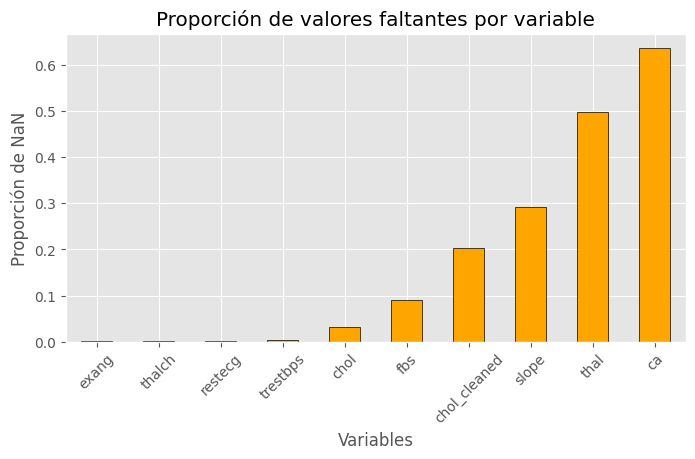

In [495]:
# Calcular el porcentaje de valores faltantes por columna
missing_data = uci_data.isna().mean().sort_values(ascending=True)

# Mostrar las variables con valores faltantes
print("Variables con valores faltantes y su proporción:")
display(missing_data[missing_data > 0])

# Visualizar la distribución de valores faltantes
plt.figure(figsize=(8, 4))
missing_data[missing_data > 0].plot(kind='bar', color='orange', edgecolor='black')
plt.title('Proporción de valores faltantes por variable')
plt.ylabel('Proporción de NaN')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.show()


**Variables con valores faltantes (prioridad descendente)**
1. exang (0.12%)
2. thalch (0.12%)
3. restecg (0.24%)
4. trestbps (0.47%)
5. chol (3.19%)
6. fbs (8.98%)
7. chol_cleaned (20.33%)
8. slope (29.20%)
9. thal (49.88%)
10. ca (63.59%)

1. Revisar la relación de **exang** con la variable objetivo (`num`).
2. Decidir qué hacer con los valores faltantes:
   - ¿Es importante para el modelo?
   - ¿Qué estrategia de imputación aplicar o descartar esta variable si es irrelevante?


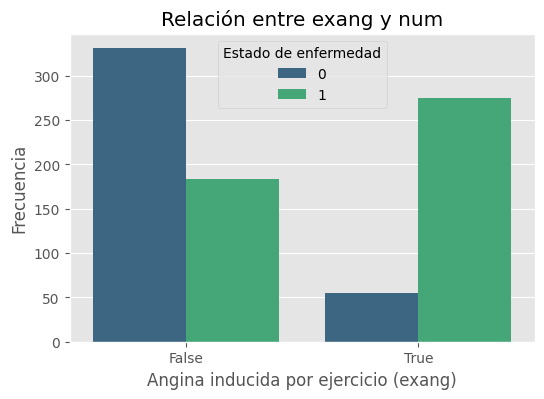

Valores faltantes en 'exang': 1 (0.12%)


In [496]:
# Relación entre exang y la variable objetivo
plt.figure(figsize=(6, 4))
sns.countplot(data=uci_data, x='exang', hue='num', palette='viridis')
plt.title('Relación entre exang y num')
plt.ylabel('Frecuencia')
plt.xlabel('Angina inducida por ejercicio (exang)')
plt.legend(title='Estado de enfermedad')
plt.show()

# Proporción de valores faltantes en exang
missing_exang = uci_data['exang'].isna().sum()
total_exang = len(uci_data['exang'])
print(f"Valores faltantes en 'exang': {missing_exang} ({missing_exang / total_exang * 100:.2f}%)")


**Conclusión de la variable exang**


1. **Distribución general**:
   - Parece haber una relación significativa entre **exang** (Angina inducida por ejercicio) y la presencia de enfermedad cardíaca (`num`).
   - Los pacientes con **exang=True** tienen una mayor proporción de enfermedad cardíaca (`num=1`).

2. **Valores faltantes**:
   - Solo hay **1 valor faltante** en esta variable, lo que representa un **0.12%** del total de datos.
   - Dado que la proporción de valores faltantes es extremadamente baja y la variable muestra ser relevante, imputaremos este valor.

3. **Estrategia de imputación**:
   - Dado que **exang** es categórica (True/False), la mejor opción es imputar el valor faltante con la **moda** (el valor más frecuente).

4. **Acción siguiente**:
   - Imputaremos el valor faltante de **exang** con la moda.


#### Análisis de la relación entre valores faltantes y otras variables


En este paso, evaluaremos si la presencia de valores faltantes en una variable está relacionada con otras variables. Esto nos ayudará a determinar si el mecanismo de valores faltantes podría ser MCAR, MAR, o MNAR.

**Objetivo**


Analizar si la presencia de valores faltantes sigue algún patrón sistemático.
Decidir si el mecanismo de valores faltantes puede clasificarse como MCAR, MAR o MNAR.
Informar cómo proceder con la imputación de los valores faltantes.
Pasos a realizar
Crear un indicador binario para los valores faltantes en cada variable.
Evaluar la correlación entre los indicadores de valores faltantes y otras variables.
Visualizar posibles patrones en la distribución de los valores faltantes.
Basándonos en los resultados, clasificar el mecanismo de valores faltantes.


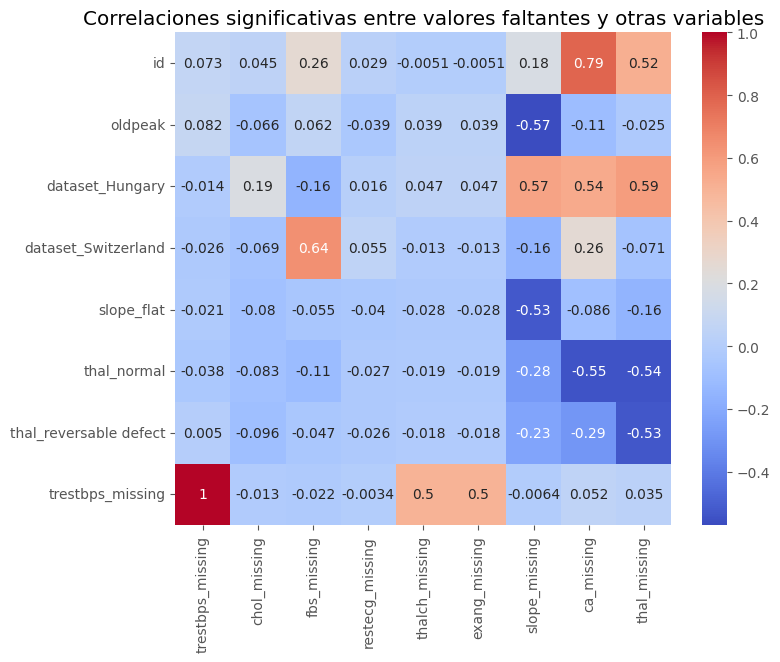

In [498]:
# Crear indicadores binarios para los valores faltantes en cada variable
missing_indicators = uci_data.isnull().astype(int).add_suffix('_missing')

# Añadir indicadores al dataset original para el análisis
data_with_missing = pd.concat([uci_data, missing_indicators], axis=1)

# Filtrar solo columnas con valores faltantes
filtered_missing_indicators = missing_indicators.loc[:, missing_indicators.sum() > 0]

# Calcular correlaciones entre indicadores de valores faltantes y variables originales
correlations = data_with_missing_encoded.corr().filter(items=filtered_missing_indicators.columns).iloc[:-len(filtered_missing_indicators.columns), :]

# Filtrar correlaciones significativas (valores absolutos > 0.5 como ejemplo)
significant_correlations = correlations[(correlations.abs() > 0.5).any(axis=1)]

# Graficar mapa de calor solo con correlaciones significativas
plt.figure(figsize=(8, len(significant_correlations) * 0.8))
sns.heatmap(significant_correlations, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlaciones significativas entre valores faltantes y otras variables')
plt.show()



Interpretación de resultados
Correlaciones:

Si los valores faltantes de una variable tienen correlaciones significativas con otras variables, esto puede indicar un patrón MAR.
Si no hay correlaciones significativas, es más probable que los valores sean MCAR.
Visualización de patrones:

Los gráficos mostrarán si la presencia de valores faltantes en cada variable varía significativamente según el estado de enfermedad (num) u otras características.
Decisión:

Clasificar el mecanismo de valores faltantes en MCAR, MAR o MNAR para cada variable.
Decidir cómo manejar los valores faltantes basándonos en el análisis (imputación, eliminación, u otros métodos avanzados).